In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
import time
#import turicreate as tc
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
import pydot
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Importing and joining dataset

In [0]:
business_accts= pd.read_csv("BusinessCase_Accts.csv")
business_cust=pd.read_csv("BusinessCase_Custs.csv")
business_tx=pd.read_csv("BusinessCase_Tx.csv")



# Combining accounts of customers

In [0]:
df_combined_accts = business_accts.groupby(['cust_id']).sum()
df_combined_accts = df_combined_accts.drop(['Unnamed: 0','iban','branchNumber'], axis=1)
df_combined_accts = df_combined_accts.reset_index()

In [4]:
df_merged_col = pd.merge(business_cust, df_combined_accts, left_on='id', right_on='cust_id', how='inner')
df_merged_col = df_merged_col.drop([ u'cust_id'], axis=1)
print('Customer dataset shape : ',business_cust.shape[0])
print('balances dataset shape : ',df_combined_accts.shape[0])
print('dataset count after joins : ',df_merged_col.shape[0])


Customer dataset shape :  5645
balances dataset shape :  5645
dataset count after joins :  5645


# Explore different categories customer wise

In [5]:
transactions = business_tx.groupby(['customerId','categoryTags']).sum() #aggregated transactions by an individual across different categories
transactions = transactions.drop([ 'Unnamed: 0','locationRegion', 'locationCity'], axis=1)
transactions = transactions.reset_index()
transactions.head()

,customerId,categoryTags,currencyAmount
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Bills and Utilities,368.72
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Income,2195.64
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Taxes,8408.73
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Transfer,6298.35
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,Income,2883.93


In [0]:
def func1(row):
    if row['categoryTags'] == 'Income':
        return row['currencyAmount']
    else:
        return 0

def func2(row):
    if row['categoryTags'] == 'Taxes':
        return row['currencyAmount']
    else:
        return 0

def func3(row):
    if row['categoryTags'] == 'Transfer':
        return row['currencyAmount']
    else:
        return 0
def func4(row):
    if row['categoryTags'] == 'Mortgage and Rent':
        return row['currencyAmount']
    else:
        return 0

def func5(row):
    if row['categoryTags'] == 'Bills and Utilities':
        return row['currencyAmount']
    else:
        return 0



def func6(row):
    if row['categoryTags'] == 'Entertainment':
        return row['currencyAmount']
    else:
        return 0

def func7(row):
    if row['categoryTags'] == 'Fees and Charges':
        return row['currencyAmount']
    else:
        return 0

def func8(row):
    if row['categoryTags'] == 'Home':
        return row['currencyAmount']
    else:
        return 0

def func9(row):
    if row['categoryTags'] == 'Shopping':
        return row['currencyAmount']
    else:
        return 0
    
def func10(row):
    if row['categoryTags'] == 'Food and Dining':
        return row['currencyAmount']
    else:
        return 0

def func11(row):
    if row['categoryTags'] == 'Travel':
        return row['currencyAmount']
    else:
        return 0

def func12(row):
    if row['categoryTags'] == 'Auto and Transport':
        return row['currencyAmount']
    else:
        return 0

def func13(row):
    if row['categoryTags'] == 'Health and Fitness':
        return row['currencyAmount']
    else:
        return 0

def func14(row):
    if row['categoryTags'] == 'Kids':
        return row['currencyAmount']
    else:
        return 0
    

transactions['Income'] = transactions.apply(func1, axis=1)
transactions['Taxes'] = transactions.apply(func2, axis=1)
transactions['Transfer'] = transactions.apply(func3, axis=1)
transactions['Mortgage_and_Rent'] = transactions.apply(func4, axis=1)
transactions['Bills_and_Utilities'] = transactions.apply(func5, axis=1)
transactions['Entertainment'] = transactions.apply(func6, axis=1)
transactions['Fees_and_Charges'] = transactions.apply(func7, axis=1)
transactions['Home'] = transactions.apply(func8, axis=1)
transactions['Shopping'] = transactions.apply(func9, axis=1)
transactions['Food_and_Dining'] = transactions.apply(func10, axis=1)
transactions['Travel'] = transactions.apply(func11, axis=1)
transactions['Auto_and_Transport'] = transactions.apply(func12, axis=1)
transactions['Health_and_Fitness'] = transactions.apply(func13, axis=1)
transactions['Kids'] = transactions.apply(func14, axis=1)

#transactions_cleaned = transactions.drop(['categoryTags','currencyAmount'], axis=1)
transactions_cleaned = transactions.groupby(['customerId']).sum().reset_index()

In [7]:
merged_dataset_final = pd.merge(df_merged_col, transactions_cleaned, left_on='id', right_on='customerId', how='inner')
merged_dataset_final = merged_dataset_final.drop([ u'customerId','workActivity','occupationIndustry','habitationStatus'], axis=1)

print('Customer dataset shape : ',df_merged_col.shape[0])
print('balances dataset shape : ',transactions_cleaned.shape[0])
print('dataset count after joins : ',merged_dataset_final.shape[0])

merged_dataset_final_ = merged_dataset_final # making a copy of the original dataset
merged_dataset_final.info()

Customer dataset shape :  5645
balances dataset shape :  5480
dataset count after joins :  5480
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 0 to 5479
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             5480 non-null   int64  
 1   id                                     5480 non-null   object 
 2   type                                   5480 non-null   object 
 3   gender                                 5480 non-null   object 
 4   birthDate                              5480 non-null   object 
 5   totalIncome                            5480 non-null   float64
 6   relationshipStatus                     5480 non-null   object 
 7   addresses_principalResidence_province  5480 non-null   object 
 8   schoolAttendance                       1556 non-null   object 
 9   schools                                390 n

# check null values and cleaning dataset

In [8]:
#in each column of dataframe
uniqueValues = merged_dataset_final.nunique(dropna=False)
print('Count of unique value in each column :')
print(uniqueValues)
# drop unnecessary columns
cleaned_data=merged_dataset_final.drop(["addresses_principalResidence_province","schoolAttendance","schools"], axis = 1) 
print(" \ntotal nulls in combined dataset : ",cleaned_data .isnull().sum())
cleaned_data.info()

Count of unique value in each column :
Unnamed: 0                               5480
id                                       5480
type                                        1
gender                                      3
birthDate                                2253
totalIncome                              4759
relationshipStatus                          5
addresses_principalResidence_province       1
schoolAttendance                            6
schools                                     2
balance                                  5317
currencyAmount                           5464
Income                                   4052
Taxes                                    1269
Transfer                                 5127
Mortgage_and_Rent                         368
Bills_and_Utilities                      3091
Entertainment                               6
Fees_and_Charges                            1
Home                                      500
Shopping                                 

# Visulaization of dataset

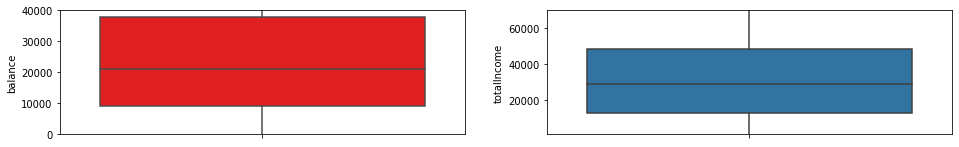

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.ylim(0,40000)
sns.boxplot(y=cleaned_data["balance"], color="red")
plt.subplot(2,2,2)
plt.ylim(1000, 70000)
sns.boxplot(y=cleaned_data["totalIncome"])
plt.show()




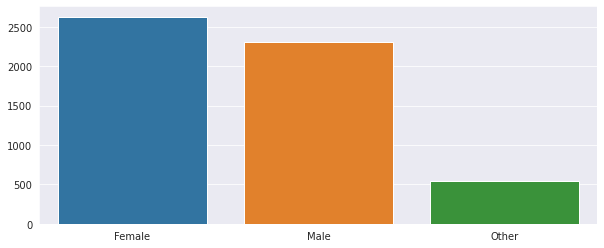

In [10]:
genders = cleaned_data.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


# 
* The number of females more than male.  
* most of the customers comes under 30,000 income range.
* Most of the customers belong to mid age to senior.
* Income and transfer are mostly used categories.
* The second important used categories are bills and utilities, food and dinning.


*   List item




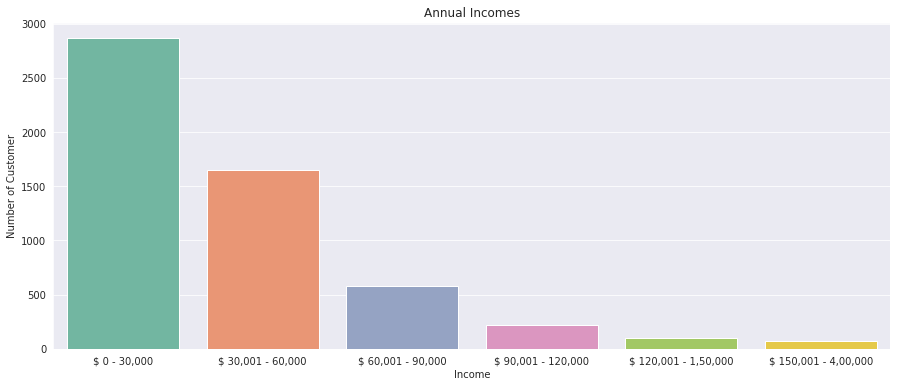

In [11]:
ai0_10 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 0) & (cleaned_data['totalIncome'] <= 30000)]
ai11_20 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 30001) & (cleaned_data['totalIncome'] <= 60000)]
ai21_30 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 60001) & (cleaned_data['totalIncome'] <= 90000)]
ai31_40 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 90001) & (cleaned_data['totalIncome'] <= 120000)]
ai41_50 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 120001) & (cleaned_data['totalIncome'] <= 150000)]
ai51_70 = cleaned_data['totalIncome'][(cleaned_data['totalIncome'] >= 150001) & (cleaned_data['totalIncome'] <= 400000)]
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 1,50,000","$ 150,001 - 4,00,000"]
aiy = [len(ai0_10.values), len(ai11_20.values), len(ai21_30.values), len(ai31_40.values), len(ai41_50.values),len(ai51_70.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

34


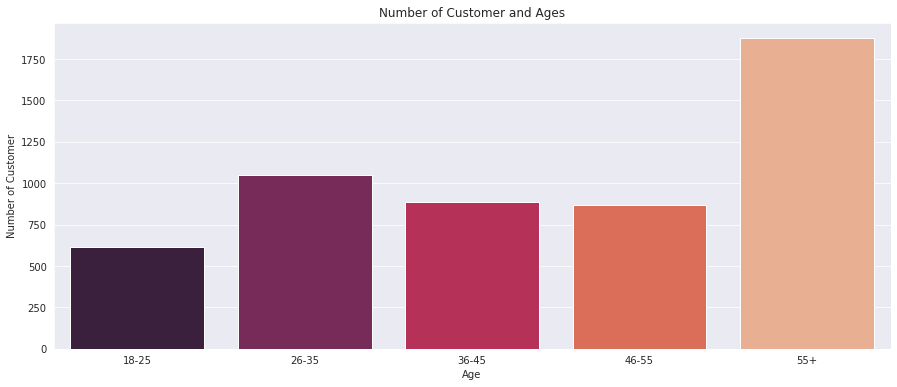

In [12]:
# Converting from date to age
cleaned_data["birthDate"] = pd.to_datetime(cleaned_data["birthDate"])
from datetime import date 
def calculateAge(birthDate): 
  today = date.today()
  age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  return age 

print(calculateAge(date(1985, 12, 26))) 
cleaned_data["age"] = cleaned_data["birthDate"].apply(lambda x : calculateAge(x))
age18_25 = cleaned_data.age[(cleaned_data.age <= 25) & (cleaned_data.age >= 18)]
age26_35 = cleaned_data.age[(cleaned_data.age <= 35) & (cleaned_data.age >= 26)]
age36_45 = cleaned_data.age[(cleaned_data.age <= 45) & (cleaned_data.age >= 36)]
age46_55 = cleaned_data.age[(cleaned_data.age <= 55) & (cleaned_data.age >= 46)]
age55above = cleaned_data.age[cleaned_data.age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
cleaned_data=cleaned_data.drop(['birthDate'],axis=1)
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


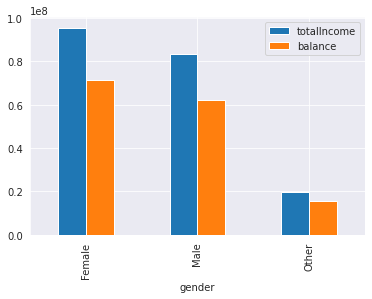

In [13]:
cleaned_data.groupby('gender')['totalIncome','balance'].sum().plot.bar()

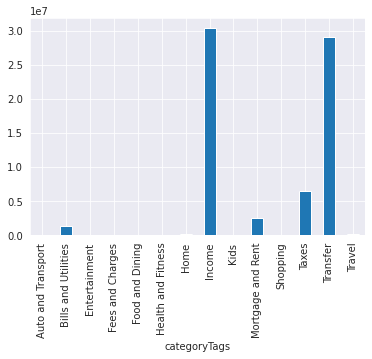

In [14]:
business_tx.groupby('categoryTags')['currencyAmount'].sum().plot.bar()

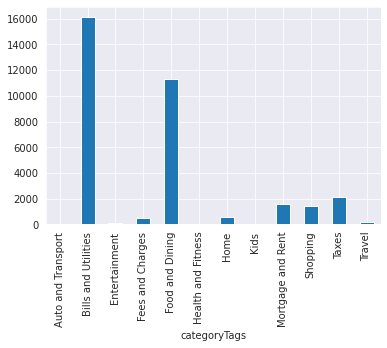

In [15]:
business_tx.loc[~business_tx['categoryTags'].isin(['Transfer','Income'])].groupby('categoryTags')['currencyAmount'].count().plot.bar()

# labelize and Normalize the dataset

In [0]:
scaled_features = cleaned_data.copy()

In [0]:
le = preprocessing.LabelEncoder()
scaled_features['gender_encoded'] = le.fit_transform(scaled_features['gender'])
scaled_features['relationshipStatus_encoded'] = le.fit_transform(scaled_features['relationshipStatus'])
scaled_features['age_encoded'] = le.fit_transform(scaled_features['age'])

scaler = StandardScaler()
scaled_features['totalIncome_scaled'] = scaler.fit_transform(scaled_features['totalIncome'].values.reshape(-1, 1))
scaled_features['balance_scaled'] = scaler.fit_transform(scaled_features['balance'].values.reshape(-1, 1))
scaled_features['Income_scaled'] = scaler.fit_transform(scaled_features['Income'].values.reshape(-1, 1))
scaled_features['Transfer_scaled'] = scaler.fit_transform(scaled_features['Transfer'].values.reshape(-1, 1))
scaled_features['Bills_and_Utilities_scaled'] = scaler.fit_transform(scaled_features['Bills_and_Utilities'].values.reshape(-1, 1))
scaled_features['Food_and_Dining_scaled'] = scaler.fit_transform(scaled_features['Food_and_Dining'].values.reshape(-1, 1))

scaled_features['Taxes_scaled'] = scaler.fit_transform(scaled_features['Taxes'].values.reshape(-1, 1))
scaled_features['Mortgage_and_Rent_scaled'] = scaler.fit_transform(scaled_features['Mortgage_and_Rent'].values.reshape(-1, 1))
scaled_features['Entertainment_scaled'] = scaler.fit_transform(scaled_features['Entertainment'].values.reshape(-1, 1))
scaled_features['Home_scaled'] = scaler.fit_transform(scaled_features['Home'].values.reshape(-1, 1))
scaled_features['Shopping_scaled'] = scaler.fit_transform(scaled_features['Shopping'].values.reshape(-1, 1))
scaled_features['Travel_scaled'] = scaler.fit_transform(scaled_features['Travel'].values.reshape(-1, 1))
scaled_features['Auto_Transport_scaled'] = scaler.fit_transform(scaled_features['Auto_and_Transport'].values.reshape(-1, 1))

In [18]:
scaled_features.head()

,Unnamed: 0,id,type,gender,totalIncome,relationshipStatus,balance,currencyAmount,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,age_encoded,totalIncome_scaled,balance_scaled,Income_scaled,Transfer_scaled,Bills_and_Utilities_scaled,Food_and_Dining_scaled,Taxes_scaled,Mortgage_and_Rent_scaled,Entertainment_scaled,Home_scaled,Shopping_scaled,Travel_scaled,Auto_Transport_scaled
0,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,0.0,Single,0.00,8557.305,0.00,0.0,8557.305,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,34,1,3,19,-1.036073,-0.975635,-0.660250,0.381010,-0.814138,-0.275179,-0.245259,-0.278796,-0.15075,-0.207476,-0.349470,-0.11093,-0.031166
1,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,40009.2,Married,39306.34,5012.680,3077.64,0.0,1463.080,0.0,471.96,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,43,0,1,28,0.107594,0.430486,-0.293708,-0.450144,0.724232,-0.275179,-0.245259,-0.278796,-0.15075,-0.207476,-0.349470,-0.11093,-0.031166
2,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,0.0,Single,122.16,1647.772,0.00,0.0,1447.042,0.0,0.00,0.0,0.0,0.0,66.3,134.43,0.0,0.0,0.0,0.0,16,0,3,1,-1.036073,-0.971265,-0.660250,-0.452023,-0.814138,2.952720,-0.245259,-0.278796,-0.15075,-0.207476,1.238557,-0.11093,-0.031166
3,3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,44709.0,Married,43687.72,25992.760,6878.32,0.0,19114.440,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,2,1,22,0.241938,0.587223,0.158947,1.617874,-0.814138,-0.275179,-0.245259,-0.278796,-0.15075,-0.207476,-0.349470,-0.11093,-0.031166
4,4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,21496.0,Single,23456.30,5304.530,4133.85,0.0,1170.680,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,1,3,22,-0.421608,-0.136524,-0.167915,-0.484401,-0.814138,-0.275179,-0.245259,-0.278796,-0.15075,-0.207476,-0.349470,-0.11093,-0.031166


# Selecting variables for clustering

In [19]:
category_cluster=scaled_features[['age_encoded','totalIncome_scaled','balance_scaled','relationshipStatus_encoded','Bills_and_Utilities_scaled','Food_and_Dining_scaled','Travel_scaled','Mortgage_and_Rent_scaled']]
category_cluster.head()

,age_encoded,totalIncome_scaled,balance_scaled,relationshipStatus_encoded,Bills_and_Utilities_scaled,Food_and_Dining_scaled,Travel_scaled,Mortgage_and_Rent_scaled
0,19,-1.036073,-0.975635,3,-0.814138,-0.275179,-0.11093,-0.278796
1,28,0.107594,0.430486,1,0.724232,-0.275179,-0.11093,-0.278796
2,1,-1.036073,-0.971265,3,-0.814138,2.952720,-0.11093,-0.278796
3,22,0.241938,0.587223,1,-0.814138,-0.275179,-0.11093,-0.278796
4,22,-0.421608,-0.136524,3,-0.814138,-0.275179,-0.11093,-0.278796


# K-Means approach
Elbow method- to know optimum number of clusters.


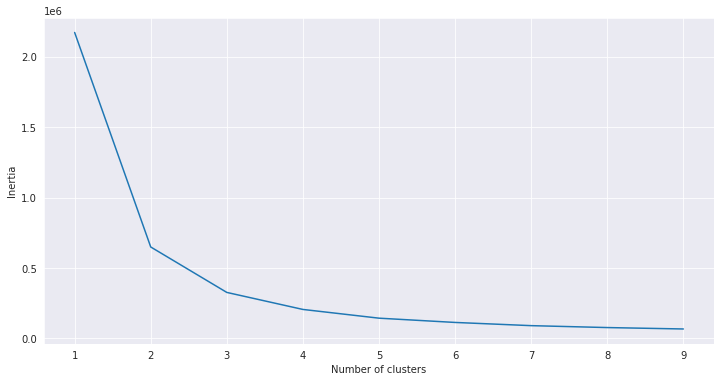

In [20]:
#find best number of cluster=elbow method
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',max_iter=100, n_init=10, random_state=0)
    kmeans.fit(category_cluster)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), SSE)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4, max_iter=100,init="k-means++",random_state=0)
kmeans.fit(category_cluster)

pred = kmeans.predict(category_cluster)
category_cluster['cluster'] = pred
kmeans.inertia_
#category_cluster.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


206088.04678379736

In [22]:
# scaled vriables dropping and keeping only original information available about customers
cluster_features_final = scaled_features.drop(['Unnamed: 0','id' ,'type','currencyAmount','Taxes_scaled','Mortgage_and_Rent_scaled','Income_scaled','Food_and_Dining_scaled',
                                               'Bills_and_Utilities_scaled','balance_scaled','totalIncome_scaled','age_encoded',
                                               'Home_scaled','Shopping_scaled','Travel_scaled','Auto_Transport_scaled','Transfer_scaled','Taxes_scaled','Entertainment_scaled'],axis=1)
#adding results of clusters to customers
cluster_features_final['cluster'] = pred
cluster_features_final.head()


,gender,totalIncome,relationshipStatus,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
0,Male,0.0,Single,0.00,0.00,0.0,8557.305,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,34,1,3,0
1,Female,40009.2,Married,39306.34,3077.64,0.0,1463.080,0.0,471.96,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,43,0,1,0
2,Female,0.0,Single,122.16,0.00,0.0,1447.042,0.0,0.00,0.0,0.0,0.0,66.3,134.43,0.0,0.0,0.0,0.0,16,0,3,2
3,Other,44709.0,Married,43687.72,6878.32,0.0,19114.440,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,2,1,0
4,Male,21496.0,Single,23456.30,4133.85,0.0,1170.680,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,1,3,0


# Exploring Clusters

In [23]:
cluster_features_group=cluster_features_final.groupby('cluster').mean()
cluster_features_group

,totalIncome,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded
cluster,,,,,,,,,,,,,,,,,,,
0,48154.066913,37912.908182,7315.569181,1599.689316,6498.433067,459.283426,256.887905,4.324991,0.0,30.062908,13.011639,0.000000,43.881577,0.000000,0.00000,0.000000,42.300062,0.642637,1.508934
1,48638.206445,34882.985885,7138.539717,1455.766133,6249.596402,582.684136,302.414157,4.603045,0.0,40.852585,14.135305,0.000000,31.586962,0.000000,0.00000,0.000000,60.299575,0.652266,1.288952
2,12734.190200,12079.886628,2794.304878,543.345541,3083.340142,254.256987,150.546373,0.577770,0.0,3.225851,19.156446,38.154228,7.095322,0.557108,0.14432,0.202874,25.216889,0.575334,2.682868
3,38588.441740,23508.365707,4790.315207,1281.943442,5789.895992,637.081352,346.695019,1.952290,0.0,18.589199,9.194781,0.000000,10.377509,0.000000,0.00000,0.000000,80.483104,0.605757,1.966208


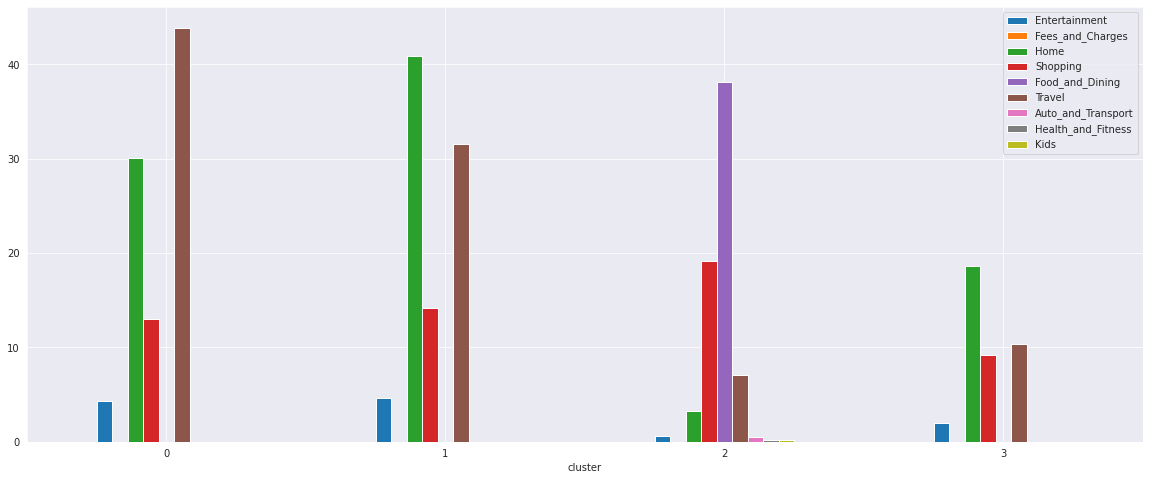

In [24]:
cluster_features_group.iloc[0:,7:-3].plot.bar(figsize=(20,8),rot=0,legend=True)


gender_encoded,0,1,2
cluster,,,
0,0,671,372
1,0,611,310
2,0,723,224
3,0,302,182


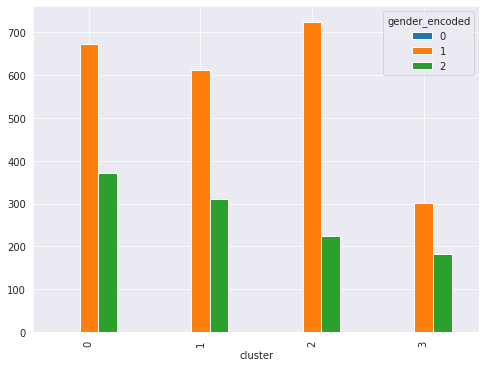

In [25]:
gender_data = cluster_features_final.groupby(['cluster','gender_encoded'])['gender_encoded'].sum().unstack('gender_encoded')#.fillna(0).sort_values(by=0,ascending=False)
gender_data.plot.bar(figsize=(8, 6))
gender_data
# 0-other,1-female,2-male

relationshipStatus_encoded,0,1,2,3,4
cluster,,,,,
0,0.0,912.0,210.0,1287.0,40.0
1,0.0,874.0,164.0,474.0,308.0
2,0.0,235.0,20.0,4161.0,NaN
3,0.0,450.0,26.0,111.0,984.0


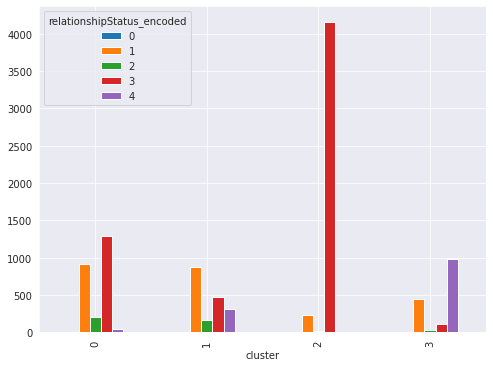

In [26]:
relationship_data = cluster_features_final.groupby(['cluster','relationshipStatus_encoded'])['relationshipStatus_encoded'].sum().unstack('relationshipStatus_encoded')#.fillna(0).sort_values(by=0,ascending=False)
relationship_data.plot.bar(figsize=(8, 6))
relationship_data
# 0-Divorced , 1-Married,2-Separated,3-Single,4-Widowed

# Cluster 0(N=1623 )
* The middle aged persons are in this category i.e. median age 42 yeras old.
* The singles relationshipstatus are dominating. 
* The gender wise females are dominating in this group. 
* These customers have high spending in Bills and utilities(75%ile=444 dollars).
* These customers have high balances and income.
*These customers does not spend across food and dining with 75%ile spending 0 dollars (this could be an issue in the dataset too but we will assume that this group is not active in dining).
* These cutomers have used transfer money service significantly.

In [27]:
cluster_0=cluster_features_final.loc[cluster_features_final['cluster'] == 0].describe()
cluster_0

,totalIncome,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
count,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.0,1623.000000,1623.000000,1623.0,1623.000000,1623.0,1623.0,1623.0,1623.000000,1623.000000,1623.000000,1623.0
mean,48154.066913,37912.908182,7315.569181,1599.689316,6498.433067,459.283426,256.887905,4.324991,0.0,30.062908,13.011639,0.0,43.881577,0.0,0.0,0.0,42.300062,0.642637,1.508934,0.0
std,38400.435466,32809.422766,9980.615522,6895.425229,10304.020818,1627.374227,303.282878,23.320272,0.0,122.258390,42.873833,0.0,293.850851,0.0,0.0,0.0,5.357668,0.677601,1.010921,0.0
min,0.000000,-23735.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,33.000000,0.000000,0.000000,0.0
25%,26240.200000,18890.660000,1811.025000,0.000000,1244.895000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,38.000000,0.000000,1.000000,0.0
50%,39260.000000,31226.090000,4840.000000,0.000000,3056.560000,0.000000,158.590000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,42.000000,1.000000,1.000000,0.0
75%,60581.950000,47753.010000,8902.860000,272.000000,6618.280000,0.000000,444.780000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,47.000000,1.000000,3.000000,0.0
max,365126.300000,395333.800000,188688.160000,136805.200000,132377.760000,13390.000000,1813.490000,129.990000,0.0,1261.870000,307.170000,0.0,3968.490000,0.0,0.0,0.0,51.000000,2.000000,4.000000,0.0


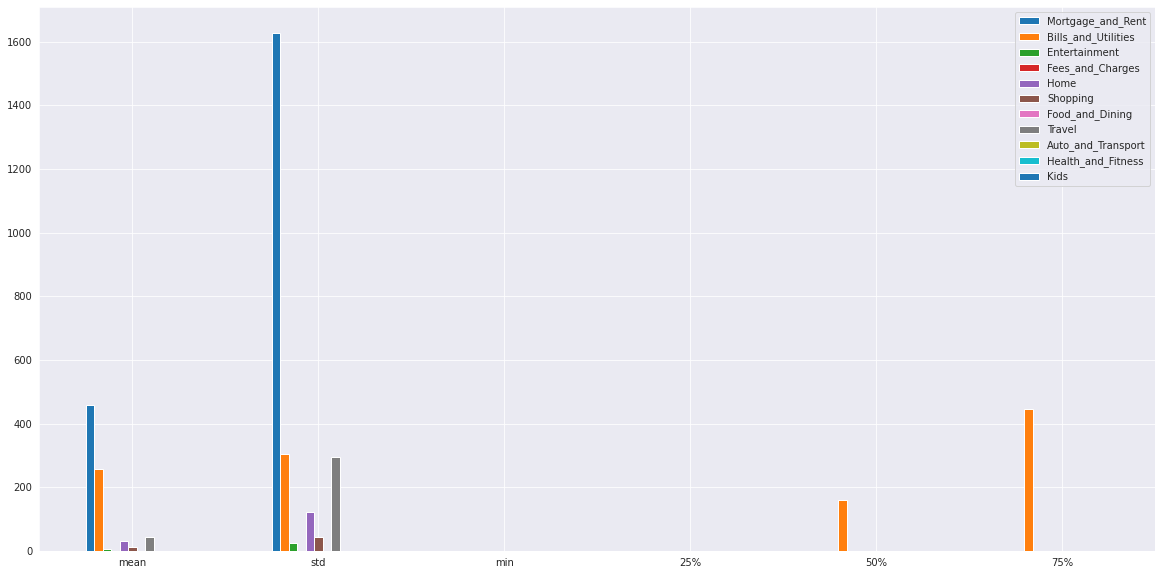

In [28]:
cluster_0.iloc[1:7,5:-4].plot.bar(figsize=(20,10),rot=0,legend=True)


# cluster 1(N=1412)

* Majority of the people in this cluster are in middle age or are seniors i.e. median age 60 years old 
*  The majority of customers having married relationshipstatus. 
* The gender wise females are dominating in this group. 
* These customers have high spending in Bills and utilities(75%ile=511 dollars).
* These customers have high totalincome.
* These cutomers have used transfer money service significantly.



In [29]:
cluster_1=cluster_features_final.loc[cluster_features_final['cluster'] ==1] .describe()
cluster_1


,totalIncome,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.0,1412.000000,1412.000000,1412.0,1412.000000,1412.0,1412.0,1412.0,1412.000000,1412.000000,1412.000000,1412.0
mean,48638.206445,34882.985885,7138.539717,1455.766133,6249.596402,582.684136,302.414157,4.603045,0.0,40.852585,14.135305,0.0,31.586962,0.0,0.0,0.0,60.299575,0.652266,1.288952,1.0
std,36606.604801,28959.309325,9743.513720,4655.406691,9525.948735,1770.152422,318.018141,24.032704,0.0,153.889796,43.064225,0.0,252.917938,0.0,0.0,0.0,5.275693,0.668340,1.034524,0.0
min,0.000000,-22849.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,52.000000,0.000000,0.000000,1.0
25%,25689.850000,15974.117500,1255.780000,0.000000,1266.040000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,56.000000,0.000000,1.000000,1.0
50%,38701.225000,29148.525000,4453.295000,0.000000,3016.165000,0.000000,213.580000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,60.000000,1.000000,1.000000,1.0
75%,63291.212500,46895.187500,9152.395000,434.500000,6689.467500,0.000000,511.632500,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,65.000000,1.000000,1.000000,1.0
max,295351.050000,262525.550000,130205.760000,53026.040000,104826.680000,13260.000000,1571.800000,129.990000,0.0,1398.210000,346.040000,0.0,3380.140000,0.0,0.0,0.0,70.000000,2.000000,4.000000,1.0


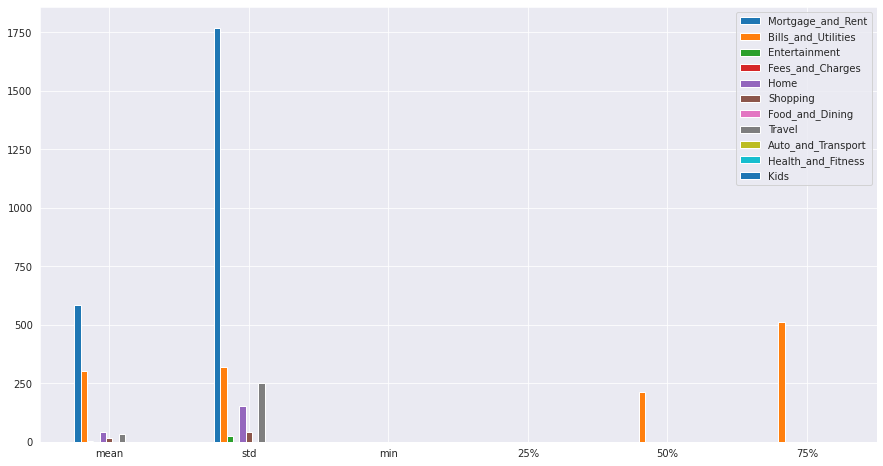

In [30]:
cluster_1.iloc[1:7,5:-4].plot.bar(figsize=(15,8),rot=0,legend=True)

# cluster 2(N=1646)
* Majority of the people in this cluster are in younger age i.e.26 years old.
* This group customers has mostly married relationshipstatus. 
* The gender wise females are dominating in this group. 
* These customers have less spending in Bills and utilities(75%ile=215 dollars).
* These customers have also spend in food and dining.
* These customers have less totalincome and balance.
* These group of customers have low income.   


In [31]:
cluster_2=cluster_features_final.loc[cluster_features_final['cluster'] ==2] .describe()
cluster_2

,totalIncome,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
count,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.0,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.000000,1646.0
mean,12734.190200,12079.886628,2794.304878,543.345541,3083.340142,254.256987,150.546373,0.577770,0.0,3.225851,19.156446,38.154228,7.095322,0.557108,0.144320,0.202874,25.216889,0.575334,2.682868,2.0
std,15653.703359,14551.334444,4277.581091,2264.721166,4297.918863,1274.649487,270.844281,9.534941,0.0,37.326071,42.470922,68.983706,133.001108,9.788633,4.719978,8.230771,5.260368,0.616963,0.743955,0.0
min,0.000000,-20509.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,2.0
25%,0.000000,657.740000,0.000000,0.000000,379.228500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,3.000000,2.0
50%,9263.760000,8082.370000,1272.540000,0.000000,1188.786250,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,3.000000,2.0
75%,17876.430000,16317.480000,3643.635000,0.000000,4446.015500,0.000000,215.937500,0.000000,0.0,0.000000,0.000000,87.177500,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,3.000000,2.0
max,198591.000000,197650.440000,53080.850000,49950.000000,51004.020000,11200.000000,1408.800000,241.820000,0.0,962.410000,612.000000,590.160000,3705.170000,247.310000,183.840000,333.930000,33.000000,2.000000,3.000000,2.0


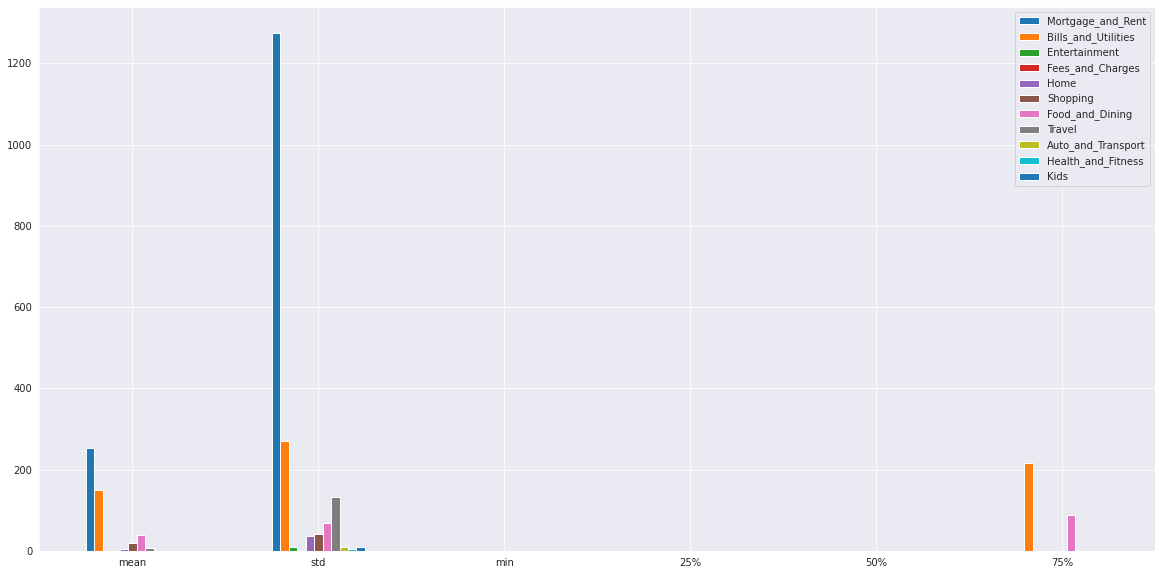

In [32]:
cluster_2.iloc[1:7,5:-4].plot.bar(figsize=(20,10),rot=0,legend=True)

# cluster 3(N=799)
* Majority of the people in this cluster are in older age i.e.80 years old.
* Most of customers have widowed relationshipstatus. 
* The gender wise females are dominating in this group. 
* These customers have consistently spending in Bills and utilities(75%ile=518 dollars).


In [33]:
cluster_3=cluster_features_final.loc[cluster_features_final['cluster'] ==3] .describe()
cluster_3

,totalIncome,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.0,799.000000,799.000000,799.0,799.000000,799.0,799.0,799.0,799.000000,799.000000,799.000000,799.0
mean,38588.441740,23508.365707,4790.315207,1281.943442,5789.895992,637.081352,346.695019,1.952290,0.0,18.589199,9.194781,0.0,10.377509,0.0,0.0,0.0,80.483104,0.605757,1.966208,3.0
std,28750.438521,20873.868624,7002.552100,4152.722280,8430.219301,1976.494517,307.615310,15.820241,0.0,92.608732,34.038370,0.0,126.111441,0.0,0.0,0.0,7.067657,0.683509,1.451854,0.0
min,0.000000,-7810.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,71.000000,0.000000,0.000000,3.0
25%,18677.050000,9957.500000,600.660000,0.000000,1121.490000,0.000000,95.750000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,75.000000,0.000000,1.000000,3.0
50%,29145.900000,17551.320000,2754.670000,0.000000,2879.580000,0.000000,283.040000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,80.000000,0.000000,1.000000,3.0
75%,50359.750000,29233.120000,5459.280000,876.500000,6841.415000,0.000000,518.795000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,85.000000,1.000000,4.000000,3.0
max,222653.200000,153074.870000,67128.040000,40773.600000,80677.230000,12760.000000,1548.680000,129.990000,0.0,1219.480000,197.380000,0.0,1929.580000,0.0,0.0,0.0,107.000000,2.000000,4.000000,3.0


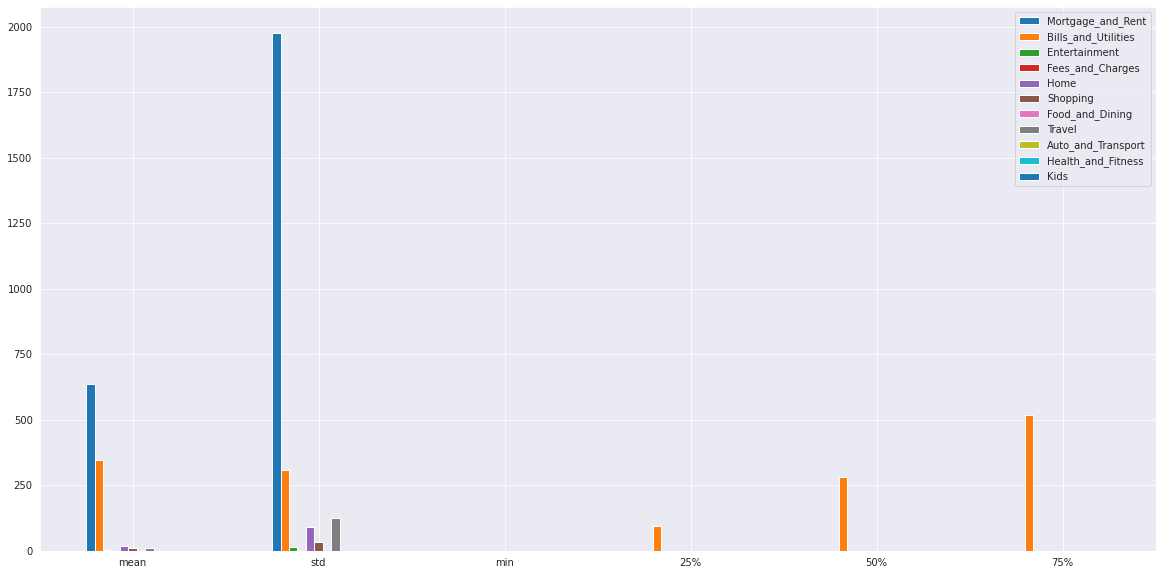

In [34]:
cluster_3.iloc[1:7,5:-4].plot.bar(figsize=(20,10),rot=0,legend=True)

In [35]:
cleaned_data.head()

,Unnamed: 0,id,type,gender,totalIncome,relationshipStatus,balance,currencyAmount,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age
0,0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,0.0,Single,0.00,8557.305,0.00,0.0,8557.305,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,34
1,1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,40009.2,Married,39306.34,5012.680,3077.64,0.0,1463.080,0.0,471.96,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,43
2,2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,0.0,Single,122.16,1647.772,0.00,0.0,1447.042,0.0,0.00,0.0,0.0,0.0,66.3,134.43,0.0,0.0,0.0,0.0,16
3,3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,44709.0,Married,43687.72,25992.760,6878.32,0.0,19114.440,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37
4,4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,21496.0,Single,23456.30,5304.530,4133.85,0.0,1170.680,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37


In [0]:
aa=cleaned_data.iloc[:,8:-1]

In [37]:
cluster_features_final.head()

,gender,totalIncome,relationshipStatus,balance,Income,Taxes,Transfer,Mortgage_and_Rent,Bills_and_Utilities,Entertainment,Fees_and_Charges,Home,Shopping,Food_and_Dining,Travel,Auto_and_Transport,Health_and_Fitness,Kids,age,gender_encoded,relationshipStatus_encoded,cluster
0,Male,0.0,Single,0.00,0.00,0.0,8557.305,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,34,1,3,0
1,Female,40009.2,Married,39306.34,3077.64,0.0,1463.080,0.0,471.96,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,43,0,1,0
2,Female,0.0,Single,122.16,0.00,0.0,1447.042,0.0,0.00,0.0,0.0,0.0,66.3,134.43,0.0,0.0,0.0,0.0,16,0,3,2
3,Other,44709.0,Married,43687.72,6878.32,0.0,19114.440,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,2,1,0
4,Male,21496.0,Single,23456.30,4133.85,0.0,1170.680,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37,1,3,0


In [0]:
#aa=cluster_features_final.iloc[1:7,5:-4]

In [59]:
# Create list to loop through
dep_vars = list(aa.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = aa.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(aa.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))
  

R2 score for Income as dependent variable: -0.6359245333907684
R2 score for Taxes as dependent variable: -0.8293625769734829
R2 score for Transfer as dependent variable: -0.697539104133654
R2 score for Mortgage_and_Rent as dependent variable: -0.7591082028776035
R2 score for Bills_and_Utilities as dependent variable: -0.22002084182474713
R2 score for Entertainment as dependent variable: -1.441103640583532
R2 score for Fees_and_Charges as dependent variable: 1.0
R2 score for Home as dependent variable: -0.5534530499956669
R2 score for Shopping as dependent variable: -0.8815427626891121
R2 score for Food_and_Dining as dependent variable: 0.5348640937131056
R2 score for Travel as dependent variable: -0.6733843577057452
R2 score for Auto_and_Transport as dependent variable: -0.0007304601899196239
R2 score for Health_and_Fitness as dependent variable: -0.0007304601899198461
R2 score for Kids as dependent variable: -0.0007304601899194019


#
food and dining has postive score
the other variables show negative relationship.
shopping,taxes has maximum negative score

In [0]:
from sklearn.decomposition import PCA

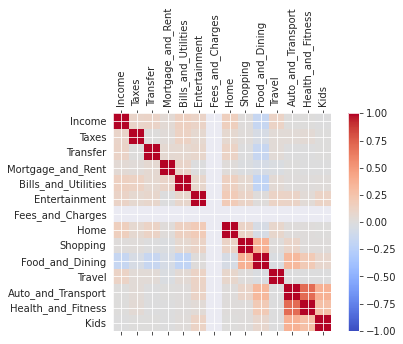

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = aa.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(aa.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(aa.columns)
ax.set_yticklabels(aa.columns)
plt.show()

# correlation
when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.
it shows some positive relationship beween auto and transport and health and fitness, shopping and food and dinning.